# Single Neuron-based Network

In this tutorial, you'll build and train a single neuron based neural network to learn a patterns from data to make predictions for time required for food delivery by a person, given distances. The neural network will learn from historical delivery data to help you predict the time required for the delivery.

The high-level Machine Learning (ML) pipeline for this task is as follows.

1. Prepare delivery data - the distances and times from past orders.
2. Build a simple neural network over just a single neuron. We shall use PyTorch as a deel learning framework.
3. Train the model to find the relationship between distance and delivery time.
4. Use the model to predict the delivery time for new orders.

## Importing Packages

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

## Data Ingestion & Preparation

Defines the two essential tensors for this task:
- The distances tensor contains data points for four recent deliveries (in miles).
- The times tensor shows how long each delivery took (in minutes).

In [2]:
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

## Modeling

Let's assume that there is a linear relationship between distance and time, a reasonable starting point. The single neuron-based model that implements the following linear equation will learn this relationship.

> <code>Time = W × Distance + B</code>

The task of the model traning is find the best values for the **weight (W)** and **bias (B)** that will the model on the data.

In [ ]:
# Creates a model with one input (distance) and one output (time)
# `nn.Linear(1, 1)`: The first `1` means it takes one input (distance), and the second `1` means
# one neuron that is producing one output (predicted time).
model = nn.Sequential(nn.Linear(1, 1))

### Model Training

In [4]:
# Defines the loss function and optimizer

loss_function = nn.MSELoss()    # Measures the mean squared loss during training

# Stochastic Gradient Descent optimizer adjusts model's weight and bias parameters based on the errors
optimizer = optim.SGD(model.parameters(), lr = 0.01)    

In [5]:
# Model cycles through the data repeatedly to discover gradually the relationship between distance and delivery time.

for epoch in range(500):
    
    # Clears gradients from the previous round. Without this, PyTorch would accumulate adjustments, which could break the learning process.
    optimizer.zero_grad()   

    outputs = model(distances)              # Performs the "forward pass", where the model makes predictions based on the input distances.
    loss = loss_function(outputs, times)    # Calculates how wrong the predicted outputs are by comparing them to the actual delivery times.
    loss.backward()                         # The "backward pass" (backpropagation) is performed, which calculates exactly how to adjust the weight and bias to reduce the error.
    optimizer.step()                        # Updates the model's parameters using those calculated adjustments.

    # The loss is printed every 50 epochs to track the model's learning progress as the error decreases.
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.03416692465543747
Epoch 100: Loss = 0.0318964347243309
Epoch 150: Loss = 0.030217865481972694
Epoch 200: Loss = 0.028974303975701332
Epoch 250: Loss = 0.02805289253592491
Epoch 300: Loss = 0.027369976043701172
Epoch 350: Loss = 0.026864293962717056
Epoch 400: Loss = 0.02648947387933731
Epoch 450: Loss = 0.026211759075522423
Epoch 500: Loss = 0.026005936786532402


**Visualizing the Training Results**

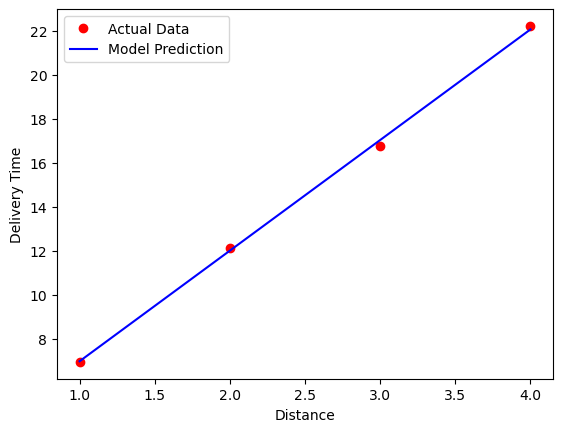

In [ ]:
# Let's see how the model learned the pattern by plotting the model's predictions as a line against 
# the actual delivery data points.

plt.plot(distances.numpy(), times.numpy(), 'ro', label='Actual Data')           # Actual data points in red
predicted_times = model(distances).detach().numpy()                             # Model's predicted times
plt.plot(distances.numpy(), predicted_times, 'b-', label='Model Prediction')    # Model's prediction line in blue
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.legend()
plt.show()

**Making Prediction on New Data**

Just checking model by asking it to predict time required to deliver food for a distance of, for example, of 7 miles.

In [9]:
distance_to_predict = 7.0

In [11]:
with torch.no_grad(): # Switches context from training to prediction also making it the inference process faster and efficient.
    test_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)  # Converts Python variable to a PyTorch 2-D tensor
    predicted_time = model(test_distance)                                       # Passes the new data to the trained model to get a prediction
    print(f"Predicted time for {distance_to_predict}-miles delivery is {predicted_time.item():.1f} minutes")

Predicted time for 7.0-miles delivery is 37.1 minutes


### Inspecting Model's Parameters
Finds the exact relationship the model has learned from the data by inspecting the model's internal parameters - the final weight and bias values. The linear model makes predictions over a straight line using these two parameters.

In [12]:
layer = model[0]    # Accesses the first (and only) layer of the model
weight = layer.weight.item()  # Retrieves the weight parameter
bias = layer.bias.item()      # Retrieves the bias parameter

print(f"Learned weight: {weight:.4f}")
print(f"Learned bias: {bias:.4f}")

Learned weight: 5.0209
Learned bias: 1.9692


**Interpretation of Learned Parameters:**

Weight (~5.0): For each additional mile, the model predicts the delivery time will increase by about 5.0 minutes.

Bias (~2.0): The addtional time required for any delivery, regardless of distance. This can be thought of the time needed to pick up the order and get on your bike.

With this discovered linear relationship between distance and time, the model can now predict delivery times for any distance using the equation:

`Time = 5.0 * Distance + 2.0`

## Model Evaluation

Now, the exising trained model is checked against a new, relatively complicated dataset, where the relationship between the variables i.e. distance and time is non-linear. This will also justify the need to build more complex network to model the required non-linear relationship amongst independent and dependent variables.

In [13]:
# Now, a tensor contains distances from 1 to 20 miles, and another tensor contains the corresponding delivery times in minutes.
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [14]:
# The trained model now makes predictions on this new dataset
with torch.no_grad():           # As before, torch.no_grad() switches context manager for efficient prediction
    new_predictions = model(new_distances)

In [15]:
# Now, calculates the new loss between the model's predicted delivery times and the actual times.
new_loss = loss_function(new_predictions, new_times)
print(f"Loss on new data: {new_loss.item():.2f}")

Loss on new data: 178.63


It was observed that new loss value is significantly higher than the loss on simple dataset used for training the model. This indicates that the exising simple model might not be a good fit on the new dataset with variables having non-linear relationships.

**Visualizing the Predictions against Actual Target on New Dataset**

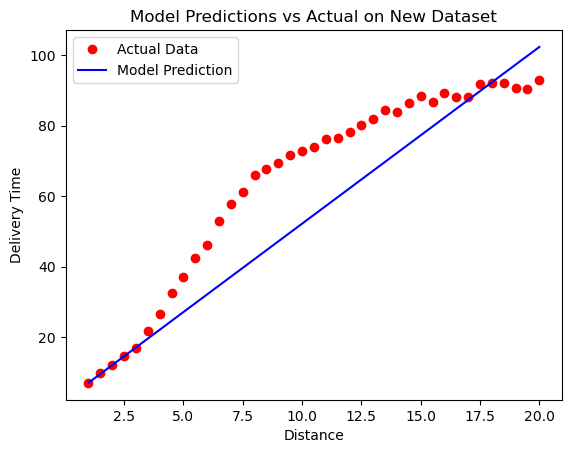

In [17]:
plt.plot(new_distances.numpy(), new_times.numpy(), 'ro', label='Actual Data')           # Actual data points in red
predicted_new_times = model(new_distances).detach().numpy()                             # Model's predicted times
plt.plot(new_distances.numpy(), predicted_new_times, 'b-', label='Model Prediction')    # Model's prediction line in blue
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.title('Model Predictions vs Actual on New Dataset')
plt.legend()
plt.show()

## Observations

1. The earlier model performed well on the data, where the relationship between distance and time was fairly consistent.

2. But on the new dataset the loss is much higher.

3. The visualization shows the followings.

    - New delivery times, shown in red points, follow a more complex pattern. The relationship between distance and time isn’t smooth or consistent, it bends and shifts.

    - The prediction of the present model are made over a straight line, shown in blue line and it learned one pattern - the linear relationship between order distance and delivery time. But now that assumption no longer holds on the new dataset.

The techniques of building neural network model with multiple neurons to fit a complex non-linear patterns will be explained in the next notebook.